In [161]:
import pandas as pd
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [263]:
import matplotlib.pyplot as plt
%matplotlib inline
df.fillna(80,inplace=True)

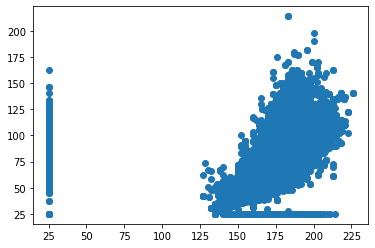

In [264]:
plt.scatter(df['Height'],df['Weight'])

**Car Age Vs Sell Price ($)**

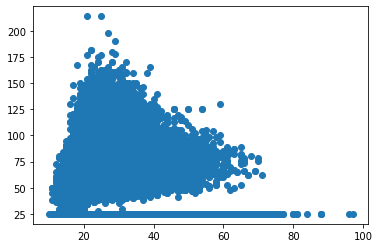

In [265]:
plt.scatter(df['Age'],df['Weight'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [266]:
X = df[['Height','Age']]

In [267]:
y = df['Weight']

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [269]:

X_train

,Height,Age
242815,165.0,23.0
205060,175.0,29.0
202284,25.0,19.0
232956,184.0,26.0
101825,160.0,28.0
...,...,...
42485,188.0,28.0
96992,175.0,19.0
148818,178.0,20.0
22394,25.0,45.0


In [270]:
X_test

,Height,Age
55985,172.0,25.0
184777,165.0,27.0
158208,178.0,29.0
40981,182.0,29.0
35164,186.0,23.0
...,...,...
122707,187.0,26.0
114261,191.0,26.0
91858,170.0,17.0
119725,185.0,29.0


In [271]:
y_train

242815    50.0
205060    67.0
202284    25.0
232956    86.0
101825    48.0
          ... 
42485     70.0
96992     64.0
148818    73.0
22394     25.0
131431    25.0
Name: Weight, Length: 189781, dtype: float64

In [272]:
y_test

55985     72.0
184777    50.0
158208    79.0
40981     84.0
35164     75.0
          ... 
122707    80.0
114261    88.0
91858     49.0
119725    68.0
7748      64.0
Name: Weight, Length: 81335, dtype: float64

**Lets run linear regression model now**

In [273]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
X_test

,Height,Age
55985,172.0,25.0
184777,165.0,27.0
158208,178.0,29.0
40981,182.0,29.0
35164,186.0,23.0
...,...,...
122707,187.0,26.0
114261,191.0,26.0
91858,170.0,17.0
119725,185.0,29.0


In [275]:
clf.predict(X_test)

array([69.28387839, 67.6481651 , 72.22285521, ..., 66.51112647,
       74.3964964 , 71.68492731])

In [276]:
y_test

55985     72.0
184777    50.0
158208    79.0
40981     84.0
35164     75.0
          ... 
122707    80.0
114261    88.0
91858     49.0
119725    68.0
7748      64.0
Name: Weight, Length: 81335, dtype: float64

In [282]:
clf.score(X_test, y_test)

0.7168830620671096

**random_state argument**

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Height,Age
92403,179.0,24.0
112618,194.0,23.0
203890,186.0,17.0
218603,179.0,18.0
127162,161.0,21.0
...,...,...
32057,162.0,15.0
12748,175.0,22.0
176263,183.0,30.0
199100,168.0,25.0
